# Set up Notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
#Create a file path
path= r'C:\Users\Zinnia\Documents\Career Foundry Data Analytics Course\Achievement 6\Data\Edited 8_13_22'

In [3]:
#Import Data
df=pd.read_csv(os.path.join(path, 'County_Data_with_Coordinates.csv'), index_col=False)

In [4]:
#Prompt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [5]:
df.shape

(21, 9)

In [6]:
df.head()

,County,Latitude,Longitude,Total_Acres_Open_Space,Total_Num_Lots,Acres_In_County,Percent_Open_Space,Population_in_2020,Acres Open Space Per Person
0,Atlantic,39.507885,-75.170510,6.954986e+04,6701,430000,0.09%,264650,0.262799
1,Bergen,40.947714,-74.364116,9.997008e+05,2316,157900,14.02%,931275,1.073475
2,Burlington,39.861181,-75.286718,1.035825e+06,9457,525000,35.33%,446301,2.320911
3,Camden,39.801846,-75.218956,8.374963e+05,1882,145500,20.28%,506721,1.652776
4,Cape May,39.055172,-75.378565,6.783120e+04,8992,397000,17.09%,92701,0.731720


In [7]:
#Import .json file for counties in NJ

county_geo= r'C:\Users\Zinnia\CountyData.json'

# Data Wrangling

#Confirmed that both are in Proper Case for the county name. All columns were set up for this analysis.

# Conduct Consistency Checks

In [8]:
#Check for missing values
df.isnull().sum()

County                         0
Latitude                       0
Longitude                      0
Total_Acres_Open_Space         0
Total_Num_Lots                 0
Acres_In_County                0
Percent_Open_Space             0
Population_in_2020             0
Acres Open Space Per Person    0
dtype: int64

In [9]:
#Check for duplicates
dups = df.duplicated()

In [10]:
dups.shape

(21,)

#No duplicates

<AxesSubplot:xlabel='Total_Acres_Open_Space', ylabel='Count'>

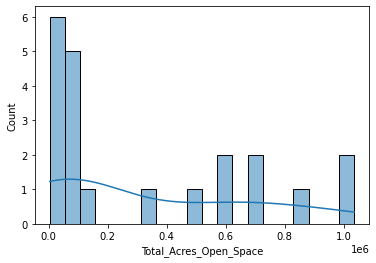

In [11]:
#Use histograms to look at the data set for issues
sns.histplot(df['Total_Acres_Open_Space'], bins=20, kde=True)

#It looks like the majority of counties have a low amount of open space

<AxesSubplot:xlabel='Total_Num_Lots', ylabel='Count'>

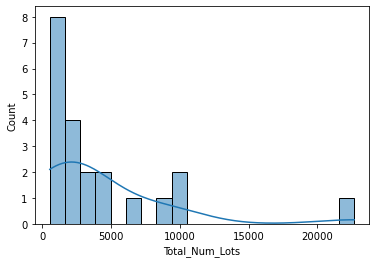

In [12]:
sns.histplot(df['Total_Num_Lots'], bins=20, kde=True)

#Ocean County also has the most lots with over 22,000 while the average is 4,297 lots in a county. 

<AxesSubplot:xlabel='Acres Open Space Per Person', ylabel='Count'>

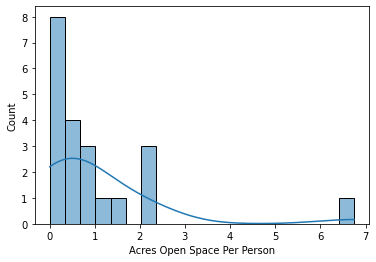

In [14]:
sns.histplot(df['Acres Open Space Per Person'], bins=20, kde=True)

#This chart shows that most counties have a low amount of open space per person. Only one county has at least an acre per person. Surprisingly its Warren county. The population density makes the difference since warren county is a rural area.

In [15]:
df.dtypes

County                          object
Latitude                       float64
Longitude                      float64
Total_Acres_Open_Space         float64
Total_Num_Lots                   int64
Acres_In_County                  int64
Percent_Open_Space              object
Population_in_2020               int64
Acres Open Space Per Person    float64
dtype: object

# Plotting a chloropleth

In [16]:
data_to_plot =df[['County','Total_Acres_Open_Space']]

In [17]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = county_geo, 
    data = data_to_plot,
    columns = ['County', 'Total_Acres_Open_Space'],
    key_on = 'properties.county',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "County").add_to(map)

folium.LayerControl().add_to(map)

In [18]:
map.save('Chloropleth_map.html')

#I wasn't able to get my Jupyter notebook to "trust" but my map did save and looks correct! 
This task helped answer the question of how much open space is in each region of New Jersey. I could probably make a few more to see how the other data is spread through the state. 

During my data cleaning and wrangling process I thought of two new questions: 
What counties should be targeted for conservation of open space? 
Which have the least open space per person? Which have the lowest overall conservation rates?
It was interesting to see that those with the most open space don't necessarily have the most open space per person. Central Jersey seems to have the most conserved open space while the most contiguous conserved open space is in Northwest NJ (which makes since since it is more farmland and mountains).
